In [1]:
from michigrad.engine import Value

# dataset XOR
dataset = [
    ([Value(0), Value(0)], Value(0)), # 0 xor 0 = 0
    ([Value(0), Value(1)], Value(1)), # 0 xor 1 = 1
    ([Value(1), Value(0)], Value(1)), # 1 xor 0 = 1
    ([Value(1), Value(1)], Value(0)), # 1 xor 1 = 0
]

In [2]:
from michigrad.nn import Layer

model = Layer(2, 1, nonlin=False) # 2 inputs, 1 neurona, sin función de activación


Grafo después del forward:


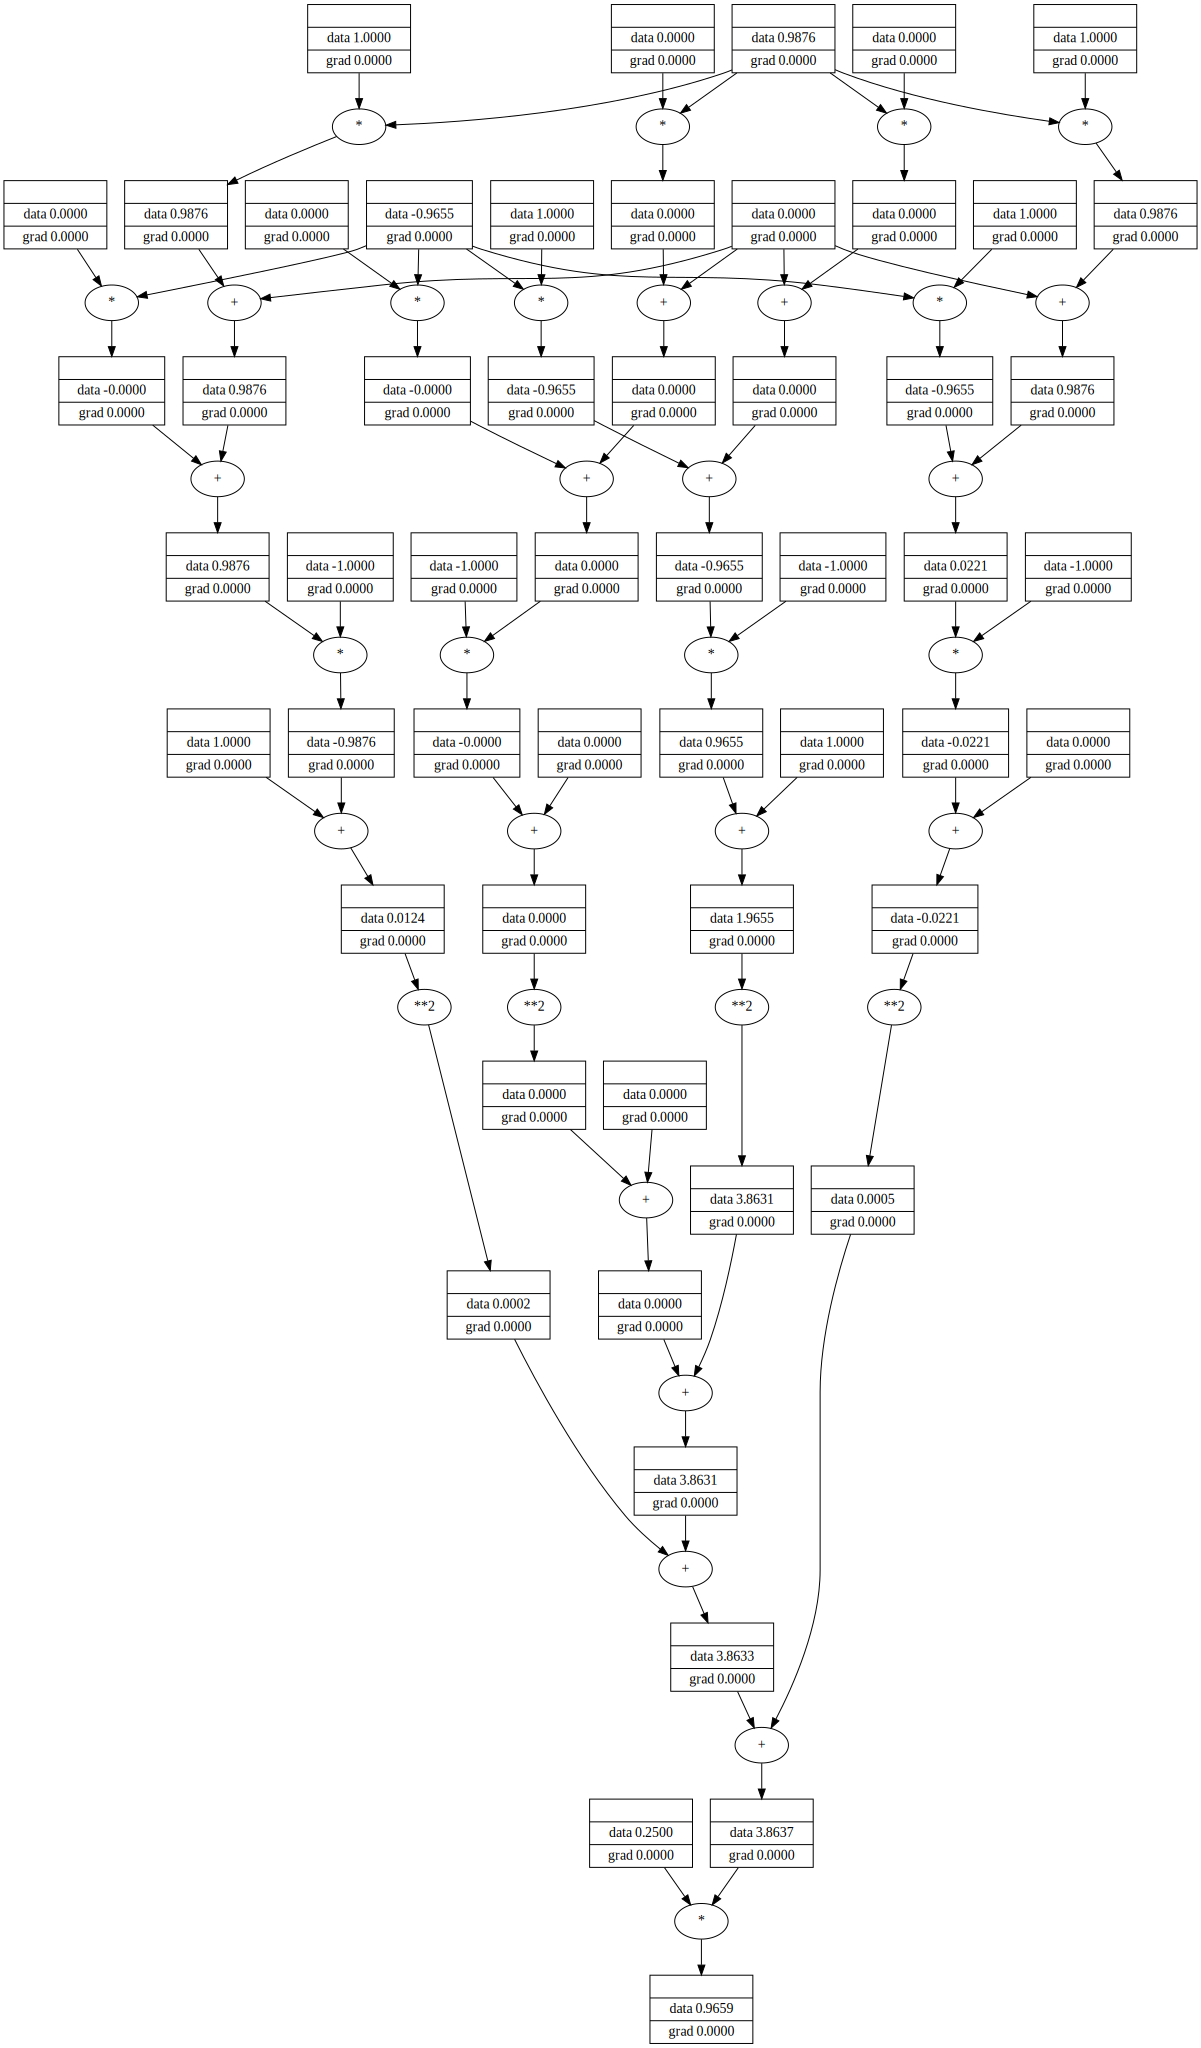

Grafo después del backward:


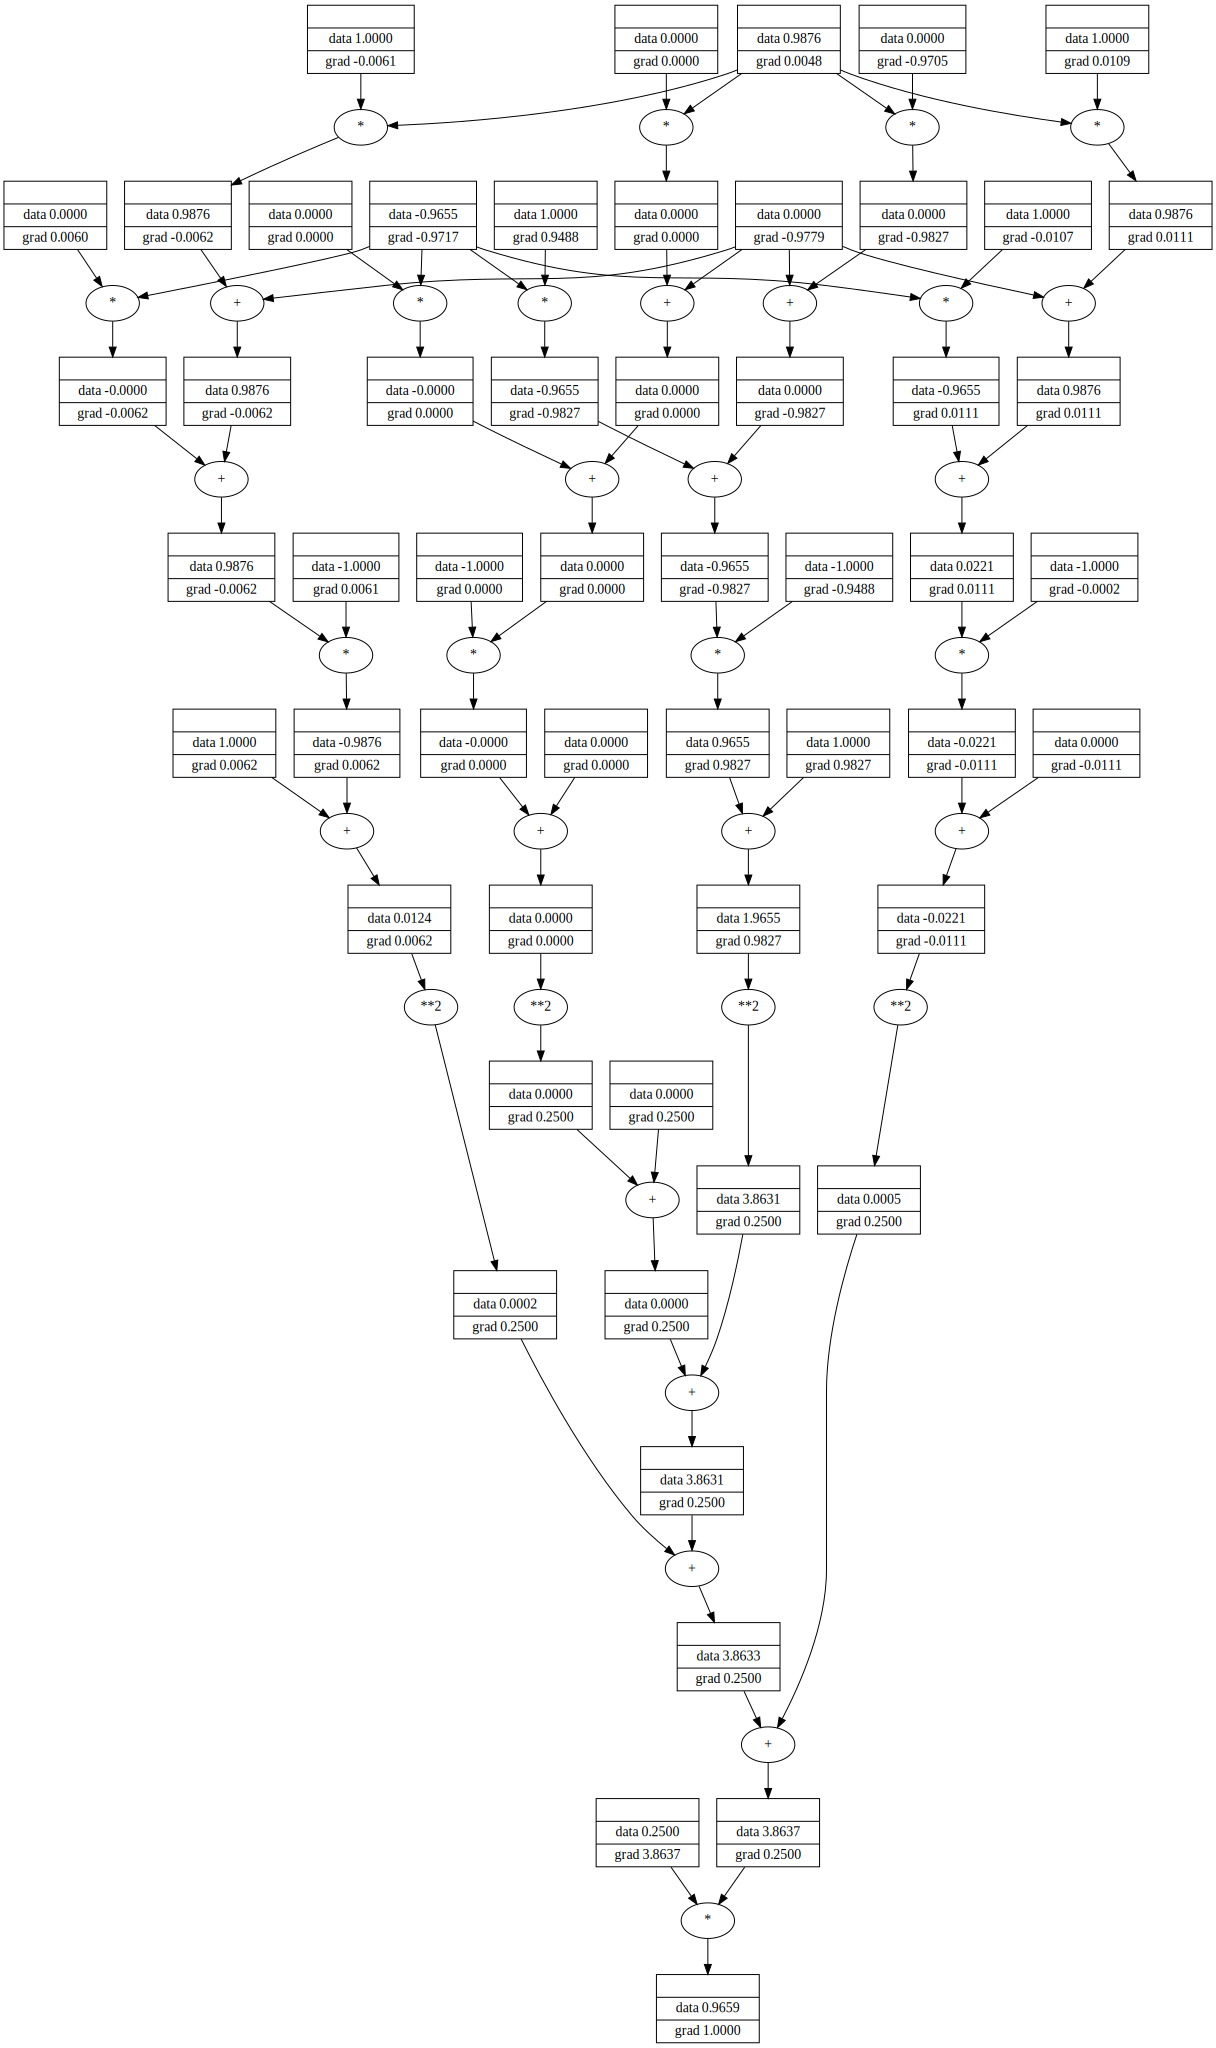

In [3]:
from michigrad.visualize import show_graph

params = model.parameters()
lr = 0.1   # learning rate

lista_loss = list()

EPOCAS = 100
# Entrenamiento
for epoch in range(EPOCAS):

    # Reseteo loss
    loss = Value(0)

    # Forward: Calculo L con SME
    for x, y in dataset:
        yhat = model(x)
        loss = loss + (y - yhat)**2

    loss = loss * 0.25  # promedio
    lista_loss.append(loss.data)
    if epoch == 0:
      print("Grafo después del forward:")
      dot = show_graph(loss, rankdir="TB", format="png")
      display(dot) #para que me lo umprima Jupyter a pesar de no ser la última línea

    # Reseteo gradientes
    for p in params:
        p.grad = 0

    # Backpropagation
    loss.backward()

    if epoch == 0:
      print("Grafo después del backward:")
      dot = show_graph(loss, rankdir="TB", format="png")
      # para que me lo umprima Jupyter a pesar de no ser la última línea
      display(dot)

    # Descenso del gradiente (actualiza parámetros) 
    for p in params:
        p.data -= lr * p.grad



    

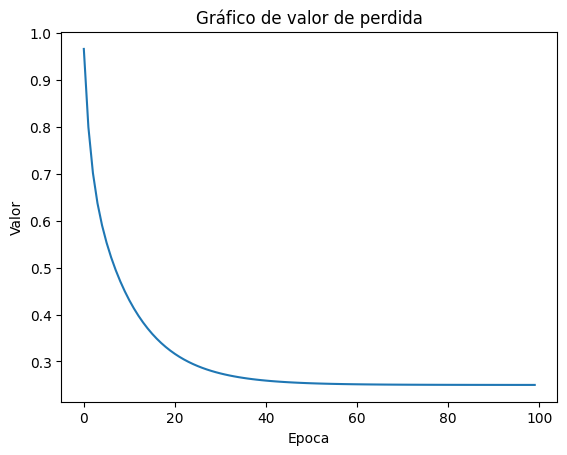

In [4]:
import matplotlib.pyplot as plt

# Crear gráfico de líneas
plt.plot(lista_loss)

# Personalizar el gráfico (opcional)
plt.title('Gráfico de valor de perdida')
plt.xlabel('Epoca')
plt.ylabel('Valor')

# Mostrar el gráfico
plt.show()